Wallmart Sales Forecasting Model:

In [63]:
pip install pandas

You should consider upgrading via the 'c:\Users\rkamr\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [64]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\rkamr\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [65]:
pip install Scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\rkamr\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [66]:
pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\rkamr\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

import xgboost as xgb # for modelling
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [68]:
df_train=pd.read_csv('train.csv')
df_train = df_train.set_index('Date')
df_train.index = pd.to_datetime(df_train.index)
df_train.sort_index(inplace=True)
df_train

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-02-05,20,44,10130.02,False,25.92,2.784,NaN,NaN,NaN,NaN,NaN,204.247194,8.187,A,203742
2010-02-05,14,31,3798.40,False,27.31,2.784,NaN,NaN,NaN,NaN,NaN,181.871190,8.992,A,200898
2010-02-05,12,94,4.96,False,49.47,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,13.975,B,112238
2010-02-05,41,40,47546.05,False,30.27,2.580,NaN,NaN,NaN,NaN,NaN,189.381697,7.541,A,196321
2010-02-05,28,4,33057.95,False,49.47,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,13.975,A,206302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,38,34,5.96,False,65.95,4.301,148.32,6.73,3.05,NaN,344.78,131.193097,10.199,C,39690
2012-10-26,18,60,153.00,False,56.09,3.917,5430.61,128.31,50.00,822.64,969.64,138.728161,8.243,B,120653
2012-10-26,14,2,61378.96,False,58.85,3.882,9258.41,99.19,117.84,1489.28,1433.31,192.308899,8.667,A,200898


In [69]:
df_train.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-02-05,20,44,10130.02,False,25.92,2.784,NaN,NaN,NaN,NaN,NaN,204.247194,8.187,A,203742
2010-02-05,14,31,3798.40,False,27.31,2.784,NaN,NaN,NaN,NaN,NaN,181.871190,8.992,A,200898
2010-02-05,12,94,4.96,False,49.47,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,13.975,B,112238
2010-02-05,41,40,47546.05,False,30.27,2.580,NaN,NaN,NaN,NaN,NaN,189.381697,7.541,A,196321
2010-02-05,28,4,33057.95,False,49.47,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,13.975,A,206302


In [71]:
df_train.duplicated().sum() #checking for duplicate rows
# Here, 0 means there are no duplicate values

0

In [72]:
df_train.shape #This shows the dimensions of the dataframe. This has (no. of rows, no. of columns).

(282451, 15)

In [73]:
(df_train.isnull().sum()/len(df_train))*100  #isnull().sum() gives total number of null values in column

Store            0.000000
Dept             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.411526
MarkDown2       73.718627
MarkDown3       67.597566
MarkDown4       68.125091
MarkDown5       64.231318
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
dtype: float64

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

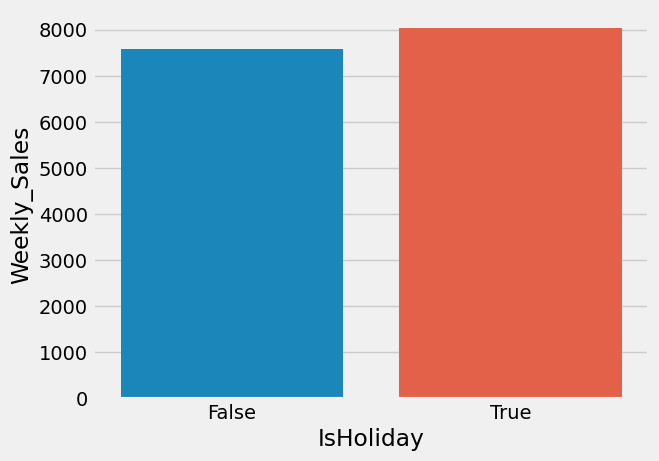

In [77]:
holiday = df_train[['Weekly_Sales','IsHoliday']].groupby(['IsHoliday']).median() #checking if holidays and weekdays or non-holidays have equal sales
holiday

sns.barplot(x=holiday.index,y=holiday.Weekly_Sales)

Plotting the Dataframe:

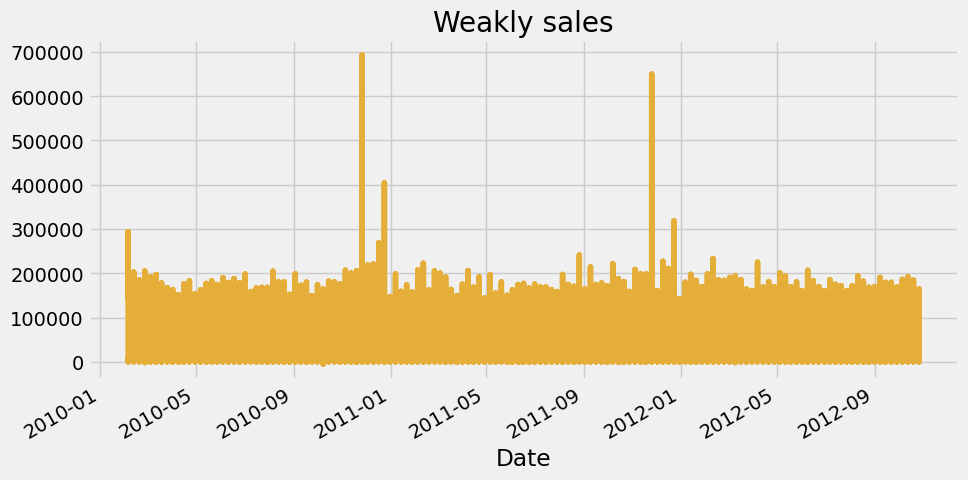

In [78]:
df_train.sort_index(ascending=True,inplace=True)
df_train["Weekly_Sales"].plot(color=color_pal[2],title="Weakly sales",figsize=(10,5))
plt.show()


<Axes: xlabel='Date', ylabel='Weekly_Sales'>

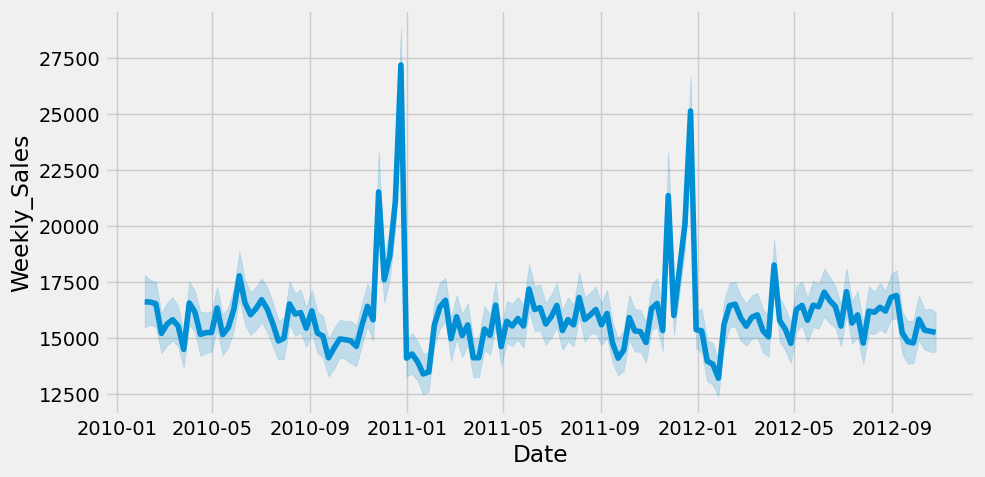

In [79]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=df_train.index,y=df_train.Weekly_Sales)

Modification and Feature Creation:

In [80]:
def modify_categories(x: str):
    if x == 'A':
        return 1
    if x == 'B':
        return 2
    return 3

def create_features(df):
    df['Week'] = pd.to_datetime(df.index).isocalendar().week
    df['Year'] = pd.to_datetime(df.index).isocalendar().year

    df['Week'] = df['Week'].astype('int')
    df['Year'] = df['Year'].astype('int')

    df['ModType'] = df['Type'].apply(lambda x: modify_categories(x)) 
    df['IsChristmas'] = df['Week'].apply(lambda x: 1 if x == 51 else 0)
    df['IsThanksgiving'] = df['Week'].apply(lambda x: 1 if x == 47 else 0)
    
    return df

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year
Date,,,,,,,,,,,,,,,,,
2010-02-05,20,44,10130.02,False,25.92,2.784,NaN,NaN,NaN,NaN,NaN,204.247194,8.187,A,203742,5,2010
2010-02-05,14,31,3798.40,False,27.31,2.784,NaN,NaN,NaN,NaN,NaN,181.871190,8.992,A,200898,5,2010
2010-02-05,12,94,4.96,False,49.47,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,13.975,B,112238,5,2010
2010-02-05,41,40,47546.05,False,30.27,2.580,NaN,NaN,NaN,NaN,NaN,189.381697,7.541,A,196321,5,2010
2010-02-05,28,4,33057.95,False,49.47,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,13.975,A,206302,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,38,34,5.96,False,65.95,4.301,148.32,6.73,3.05,NaN,344.78,131.193097,10.199,C,39690,43,2012
2012-10-26,18,60,153.00,False,56.09,3.917,5430.61,128.31,50.00,822.64,969.64,138.728161,8.243,B,120653,43,2012
2012-10-26,14,2,61378.96,False,58.85,3.882,9258.41,99.19,117.84,1489.28,1433.31,192.308899,8.667,A,200898,43,2012


In [ ]:
df_train = create_features(df_train)
df_train

In [82]:
df_train.columns #seeing all columns in dataset

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Week', 'Year',
       'ModType'],
      dtype='object')

In [83]:
features = ['Store', 'Dept', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Week', 'Year','ModType', 'IsChristmas', 'IsThanksgiving']
target = 'Weekly_Sales'

X_train = df_train[features]
Y_train = df_train[target]

In [ ]:
X_train.info()

Train/Test Split:

In [ ]:
train = df_train.loc[df_train.index < "2012-05-01"]
test = df_train.loc[df_train.index >= "2012-05-01"]

fig, ax = plt.subplots(figsize=((10,5)))
sns.lineplot(x=train.index,y=train.Weekly_Sales)
sns.lineplot(x=test.index,y=test.Weekly_Sales)
ax.legend(['Training Set','_nolegend_','Test Set','_nolegend_'])
plt.show()

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',n_estimators=500,
                       max_depth=15)
reg.fit(train[features], train[target],verbose = 100)

In [ ]:
test_predict = reg.predict(test[features])

In [ ]:
train = df_train.loc[df_train.index < "2012-05-01"]
test = df_train.loc[df_train.index >= "2012-05-01"]

fig, ax = plt.subplots(figsize=((10,5)))
sns.lineplot(x=train.index,y=train.Weekly_Sales)
sns.lineplot(x=test.index,y=test.Weekly_Sales)
sns.lineplot(x=test.index,y=test_predict)
ax.legend(['Training Set','_nolegend_','Test Set','_nolegend_'])
plt.show()

In [ ]:
score = np.sqrt(mean_squared_error(test_predict,test['Weekly_Sales'])) #Calculating Root mean Square error
print(f'RMSE score on Test Set : {score:0.2f}')

Predicting Weekly Sales Using Xgboost:

In [ ]:
regressor = xgb.XGBRegressor(base_score=0.5, booster='gbtree',n_estimators=1000,max_depth=15)
regressor.fit(X_train, Y_train,verbose = 100)

In [ ]:
df_test = pd.read_csv('data/test.csv')
df_test= df_test.set_index('Date')
df_test.index = pd.to_datetime(df_test.index)
df_test.sort_index(ascending=True,inplace=True)

In [ ]:
df_test = create_features(df_test)
df_test

In [ ]:
X_test = df_test.loc[:,features]
Y_pred = regressor.predict(X_test)

In [ ]:
fig, axs = plt.subplots(figsize=(15, 8))
sns.lineplot(x=X_train.index,y=Y_train,size=3,legend=False)
sns.lineplot(x=X_test.index,y=Y_pred)
plt.legend(["Actual data",'_nolegend_',"Predicted data",'_nolegend_'])
axs.set_title("actual and predicted data")
plt.show()

In [91]:
X_train = X_train.fillna(0)
Y_train = Y_train.fillna(0)

Creating a forecasting model using RandomForest:

In [92]:
from sklearn.ensemble import RandomForestRegressor #importing RandomForestRegressor


In [93]:
regressor1 = RandomForestRegressor(max_depth=24, random_state=0) #creating a regression model
regressor1.fit(X_train, Y_train)

RandomForestRegressor(max_depth=24, random_state=0)

In [94]:
X_test=X_test.fillna(0)

In [95]:
y_pred = regressor1.predict(X_test)

Predictions:

C:\Users\rkamr\AppData\Local\Temp\ipykernel_22552\2265601535.py:4: UserWarning: The label '_nolegend_' of <matplotlib.collections.PolyCollection object at 0x000001ED492DE190> starts with '_'. It is thus excluded from the legend.
  plt.legend(["Actual data",'_nolegend_',"Predicted data",'_nolegend_'])
C:\Users\rkamr\AppData\Local\Temp\ipykernel_22552\2265601535.py:4: UserWarning: The label '_nolegend_' of <matplotlib.collections.PolyCollection object at 0x000001ED03D86BE0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["Actual data",'_nolegend_',"Predicted data",'_nolegend_'])


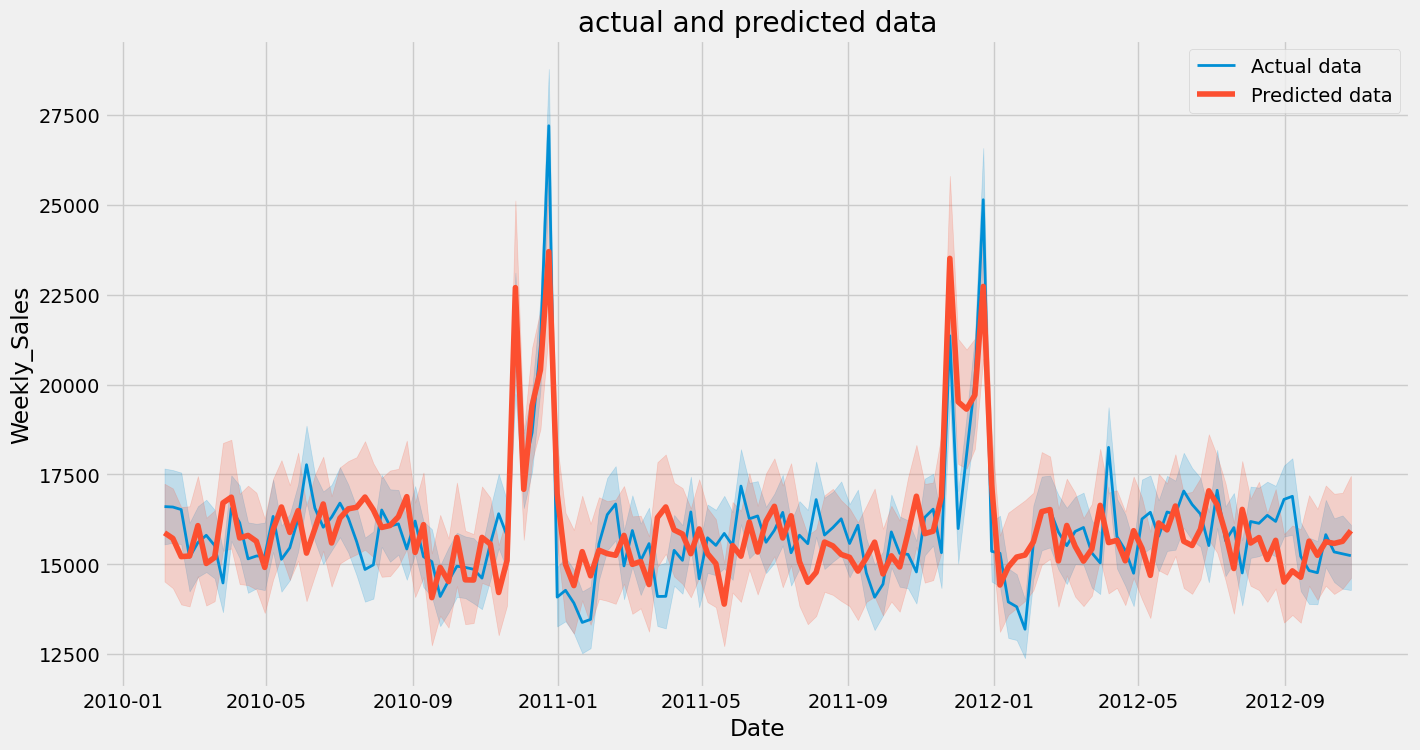

In [96]:
fig, axs = plt.subplots(figsize=(15, 8))
sns.lineplot(x=X_train.index,y=Y_train,size=3,legend=False)
sns.lineplot(x=X_test.index,y=y_pred)
plt.legend(["Actual data",'_nolegend_',"Predicted data",'_nolegend_'])
axs.set_title("actual and predicted data")
plt.show()

Taking Average of Both RandomForest and Xgboost:

In [97]:
y_pred_avg =  (y_pred+Y_pred)/2
y_pred_avg

array([5606.31446655, 1671.58187323,  -87.99215987, ..., 7023.32165689,
        627.8527132 , 1455.44197647])

Predictions:

C:\Users\rkamr\AppData\Local\Temp\ipykernel_22552\2862110245.py:4: UserWarning: The label '_nolegend_' of <matplotlib.collections.PolyCollection object at 0x000001ED3886B8E0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["Actual data",'_nolegend_',"Predicted data",'_nolegend_'])
C:\Users\rkamr\AppData\Local\Temp\ipykernel_22552\2862110245.py:4: UserWarning: The label '_nolegend_' of <matplotlib.collections.PolyCollection object at 0x000001ED4189A760> starts with '_'. It is thus excluded from the legend.
  plt.legend(["Actual data",'_nolegend_',"Predicted data",'_nolegend_'])


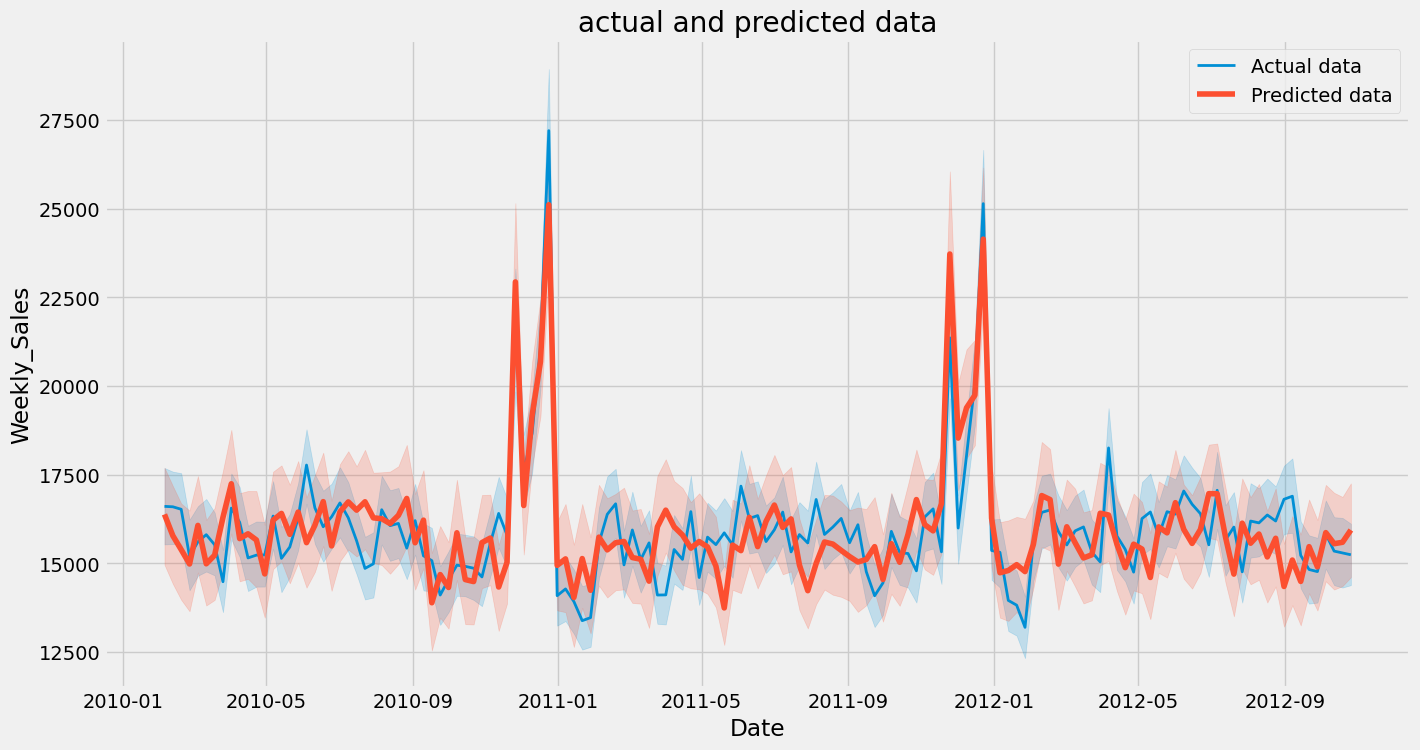

In [98]:
fig, axs = plt.subplots(figsize=(15, 8))
sns.lineplot(x=X_train.index,y=Y_train,size=3,legend=False)
sns.lineplot(x=X_test.index,y=y_pred_avg)
plt.legend(["Actual data",'_nolegend_',"Predicted data",'_nolegend_'])
axs.set_title("actual and predicted data")
plt.show()

Saving the Result as a csv file:

In [ ]:
result = pd.Series(y_pred_avg,index=X_test.index)
result.to_csv("data/submission.csv")